<a href="https://colab.research.google.com/github/Franklin10mfq/Energy-prediction-multilinear-regression/blob/main/Energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción de energía eléctrica

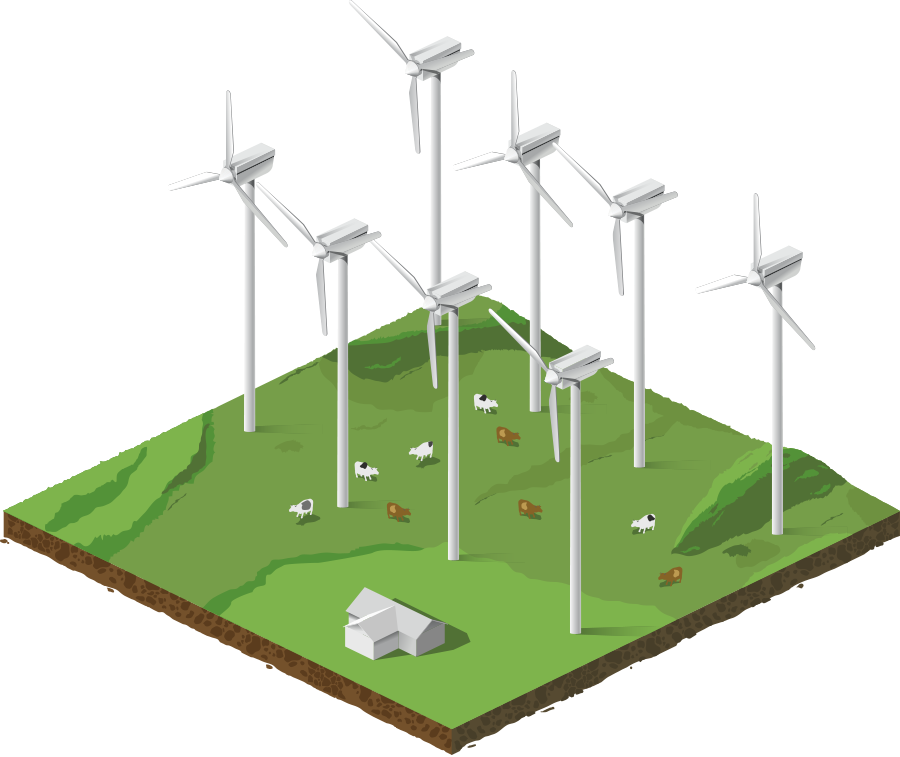

#Importando librerías y archivos

In [ ]:
!pip install kaggle

In [ ]:
 from google.colab import files

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression

#Importando el dataset

In [ ]:
print("Carga el archivo API de tu cuenta de Kaggle (Kaggle.json)")
files.upload()

Carga el archivo API de tu cuenta de Kaggle (Kaggle.json)


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"franklinjosue","key":"ad411229cb5ac39273792fc27b3773a7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jorgesandoval/wind-power-generation

wind-power-generation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('wind-power-generation.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
metadata=pd.read_csv('/content/files/Amprion.csv')
#ratings=pd.read_csv(‘/content/files/ratings.csv’)

In [ ]:
day='26/08/2019'
metadata_mask=metadata['Date']==day
filtered_metadata = metadata[metadata_mask]
filtered_metadata.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,02:30:00,02:45:00,03:00:00,03:15:00,03:30:00,03:45:00,04:00:00,04:15:00,04:30:00,04:45:00,05:00:00,05:15:00,05:30:00,05:45:00,06:00:00,06:15:00,06:30:00,06:45:00,07:00:00,07:15:00,07:30:00,07:45:00,08:00:00,08:15:00,08:30:00,08:45:00,09:00:00,09:15:00,09:30:00,...,14:00:00,14:15:00,14:30:00,14:45:00,15:00:00,15:15:00,15:30:00,15:45:00,16:00:00,16:15:00,16:30:00,16:45:00,17:00:00,17:15:00,17:30:00,17:45:00,18:00:00,18:15:00,18:30:00,18:45:00,19:00:00,19:15:00,19:30:00,19:45:00,20:00:00,20:15:00,20:30:00,20:45:00,21:00:00,21:15:00,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
3,26/08/2019,13,12,12,11,12,12,12,10,10,10,10,10,9,11,11,11,9,9,11,11,10,11,11,11,10,9,8,6,5,4,3,3,4,4,5,5,6,8,7,...,13,13,13,14,14,11,11,9,8,9,9,8,9,11,9,9,9,11,14,19,21,23,22,22,22,25,27,26,24,22,21,22,22,22,23,23,24,25,24,23


In [ ]:
y=filtered_metadata.iloc[[0]]
x=np.array([np.arange(0,1440,15)]).T
y=y.to_numpy().T
y=y[1:len(y)]

for i in np.arange(1,96,1):
  y[i]=y[i]+y[i-1]

#Entrenamiento: regresión lineal

In [ ]:
model = LinearRegression().fit(x, y)
print(model.score(x, y))

0.9579584517199446


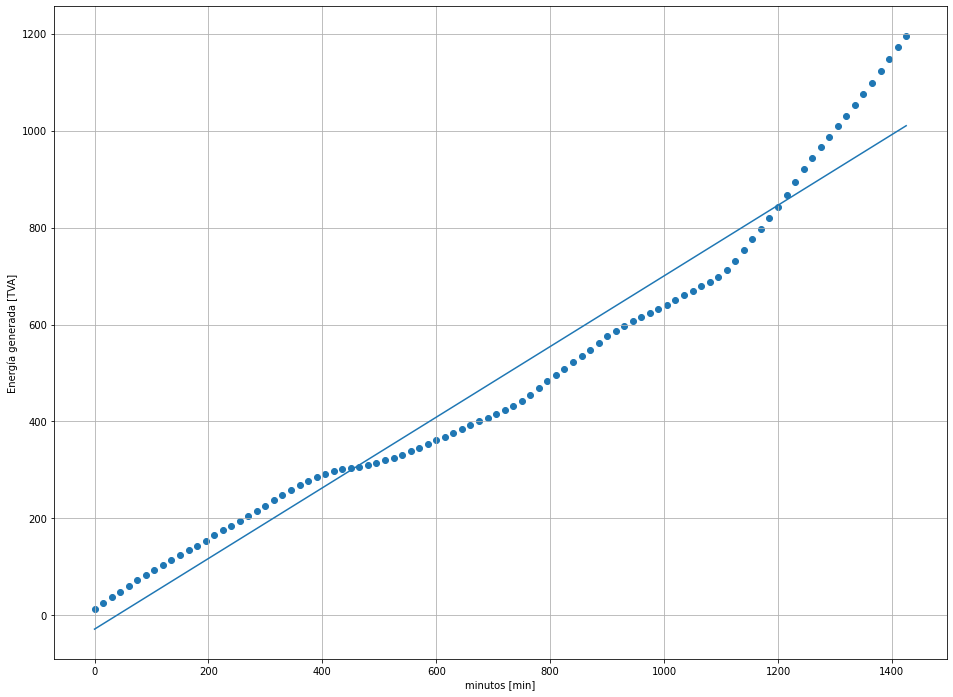

In [ ]:
from matplotlib import pyplot as plt 
from sklearn.metrics import r2_score

y_new = model.predict(x[:np.newaxis])

# plot the results
plt.figure(figsize=(16, 12))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x, y_new)

ax.set_xlabel('minutos [min]')
ax.set_ylabel('Energía generada [TVA]')

ax.axis('tight')
ax.grid()
plt.savefig('fig1.eps', format='eps')
plt.show()

#Test: regresión lineal

In [ ]:
def training(day,metadata_mask):
  filtered_metadata = metadata[metadata_mask]
  filtered_metadata.head()
  x=np.array([np.arange(0,1440,15)]).T

  y2=filtered_metadata.iloc[[0]]
  y2=y2.to_numpy().T
  y2=y2[1:len(y2)]

  for i in np.arange(1,96,1):
    y2[i]=y2[i]+y2[i-1]
  y_new = model.predict(x[:np.newaxis])
  print(model.score(x, y2))
  # plot the results
  plt.figure(figsize=(16, 12))
  ax = plt.axes()
  ax.scatter(x, y2)
  ax.plot(x, y_new)

  ax.set_xlabel('minutos [min]')
  ax.set_ylabel('Energía generada [TVA]')

  ax.axis('tight')
  ax.grid()
  plt.savefig('fig2.eps', format='eps')
  plt.show()

0.8240328212808632


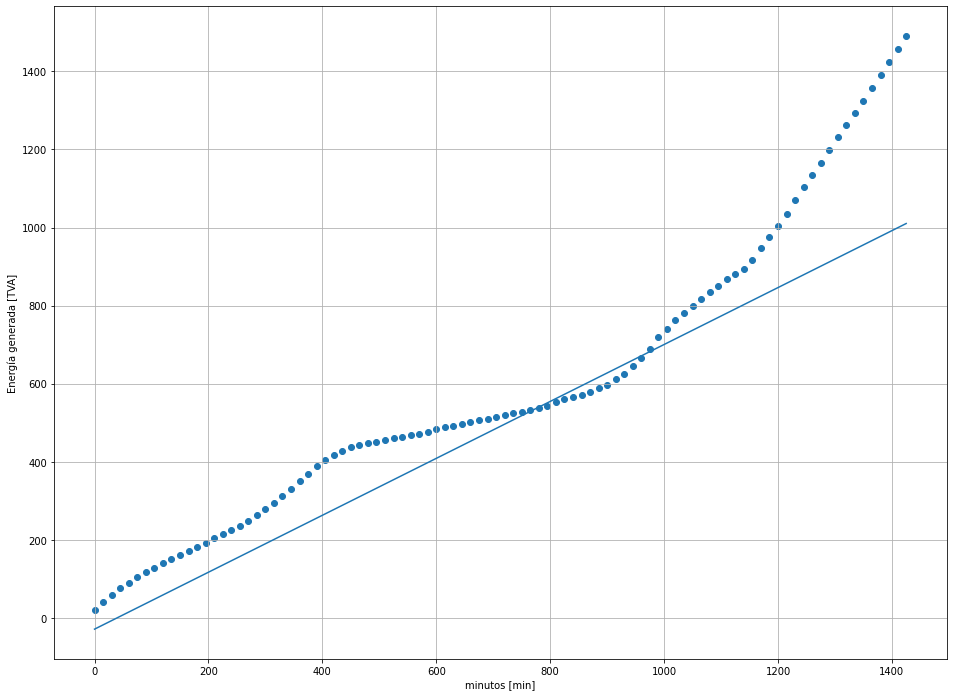

In [ ]:
day='27/08/2019'
metadata_mask=metadata['Date']==day
training(day,metadata_mask)